In [1]:
from pathlib import Path
import random 

from manipylator import HeadlessSimulatedRobot, SimulatedRobot
from manipylator.utils import render_robot_from_template

# Simulation (Headless)
In this notebook we demonstrate that the `HeadlessSimulatedRobot` inherits the capabilities of the full Genesis environment available in `SimulatedRobot`. Furthermore, even when working headlessly we can use the similar semantics to manipulate the scene and visualize it. Using this class lets us work in a non-GUI environment, like a hosted jupyter kernel.

In [2]:
with render_robot_from_template("robots/empiric") as robot_urdf:
    manny = HeadlessSimulatedRobot(robot_urdf)
print(manny.model)

[I 08/22/25 23:48:51.972 1148] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Genesis] [23:49:17] [INFO] ╭───────────────────────────────────────────────╮
[Genesis] [23:49:17] [INFO] │┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈ Genesis ┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈│
[Genesis] [23:49:17] [INFO] ╰───────────────────────────────────────────────╯
[Genesis] [23:49:17] [WARNING] No Intel XPU device available. Falling back to CPU for torch device.


/opt/conda/lib/python3.11/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


[Genesis] [23:49:18] [INFO] Consider setting 'performance_mode=True' in production to maximise runtime speed, if significantly increasing compilation time is not a concern.


RHI Error: Can not create Vulkan instance
[W 08/22/25 23:49:18.832 1148] [misc.py:adaptive_arch_select@758] Arch=[<Arch.vulkan: 10>] is not supported, falling back to CPU


[Genesis] [23:49:20] [INFO] Running on [Intel(R) Core(TM) i7-8665U CPU @ 1.90GHz] with backend gs.cpu. Device memory: 15.25 GB.
[Genesis] [23:49:20] [INFO] 🚀 Genesis initialized. 🔖 version: 0.2.1, 🌱 seed: None, 📏 precision: '32', 🐛 debug: False, 🎨 theme: 'dark'.
[Genesis] [23:49:20] [WARNING] Scene.show_FPS is deprecated. Please use Scene.profiling_options.show_FPS
[Genesis] [23:49:21] [INFO] Scene <b5a2f8b> created.
[Genesis] [23:49:21] [INFO] Adding <gs.RigidEntity>. idx: 0, uid: <8c06a8f>, morph: <gs.morphs.Plane>, material: <gs.materials.Rigid>.
[Genesis] [23:49:21] [INFO] Adding <gs.RigidEntity>. idx: 1, uid: <29afc79>, morph: <gs.morphs.URDF(file='/tmp/tmpjm4_bq6g.urdf')>, material: <gs.materials.Rigid>.


[Genesis] [23:49:30] [INFO] Falling back to legacy URDF parser. Default values of physics properties may be off.
[Genesis] [23:49:30] [INFO] Applying offset to base link's pose with user provided value in morph.
[Genesis] [23:49:51] [INFO] Building scene <b5a2f8b>...
[Genesis] [23:50:49] [INFO] Compiling simulation kernels...
[Genesis] [23:54:12] [INFO] Building visualizer...
[Genesis] [23:54:14] [INFO] Software rendering context detected. Shadows and plane reflection not supported. Beware rendering will be extremely slow.
ERobot: measured, 6 joints (RRRRRR), dynamics, geometry, collision
┌──────┬──────────────────┬───────┬──────────────────┬─────────────────────────────────────────────────────────────────────────────┐
│ link │       link       │ joint │      parent      │                             ETS: parent to link                             │
├──────┼──────────────────┼───────┼──────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│    

For an arbitrary pose, we'll calculate the forward kinematics Genesis:

In [3]:
arbitrary_pose = [random.uniform(-1, 1) for _ in range(6)]
print(arbitrary_pose)

[0.8878868104742956, 0.5548254333853173, -0.9976838440019593, 0.48300977893971275, -0.6654018378116591, 0.575560152471617]


In [4]:
translation, rotation = manny.step_to_pose(arbitrary_pose)

print(f'translation: \n{translation.cpu().numpy()}\n')
print(f'rotation matrix: \n{rotation}')

translation: 
[-0.4872654  -0.24172583  0.33703384]

rotation matrix: 
[[-0.93372903 -0.22079855  0.28177667]
 [-0.09194023 -0.61281326 -0.78486107]
 [ 0.34597267 -0.75875418  0.55190126]]


And we can render the scene in headless mode too

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
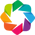

:RGB   [x,y]   (R,G,B)

In [5]:
import holoviews as hv
hv.extension('bokeh')

frame = manny.visualizer.camera.render()[0]
# frame.shape

image = hv.RGB(frame, bounds=(0, 0, frame.shape[1], frame.shape[0]))
image.opts(aspect=frame.shape[1] / frame.shape[0])